## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？





In [2]:
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0

     |████████████████████████████████| 339 kB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.1.6 which is incompatible.
     |████████████████████████████████| 412.3 MB 9.8 kB/s 
     |████████████████████████████████| 3.8 MB 41.5 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 503 kB 32.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4d65efdab1d1089e3fb3eb6579b351f1efc8d88b1033a9ca118fb068e1fa4d63
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: ten

In [3]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [4]:
# pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Mounted at /content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/keras-yolo3


In [10]:
from PIL import Image
# image = Image.open('dog.jpg')
image = Image.open("airplane.jpg") 

1.如何使用已經訓練好的模型？

如果你理解了這包程式碼，其實就會知道可以直接從 yolo.py 從 include create YOLO 的 class，然後提供我們訓練好的模型檔案以及描述類別的文件就可以啦

In [11]:
from yolo import YOLO
yolo_model = YOLO(model_path='logs/000/trained_weights_final.h5', classes_path="model_data/voc_classes.txt")
r_image = yolo_model.detect_image(image)

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 4 boxes for img
person 0.31 (59, 143) (95, 243)
person 0.87 (111, 147) (143, 234)
person 0.95 (68, 130) (85, 249)
aeroplane 0.79 (36, 0) (161, 162)
1.9041057789999627


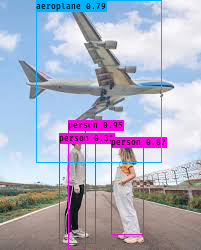

In [12]:
r_image

這個模型用了 pretrained 的權重以及 100 張圖片來 finetune，所以結果沒有很好，在這裡只是示範怎麼使用哦

2.請敘述，訓練模型時，資料集的格式是什麼？

這個問題背後的動機是希望確保你理解在訓練模型的時候我們需要把資料轉換成這份 YOLO 訓練程式碼“讀得懂”的格式。其實很簡單，只要把範例中 `convert_annotation` 這個函數給看懂就可以了

In [13]:
with open("2007_train.txt", "r") as f:
  d = f.readlines()
print(d[:10])

['./VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6\n', './VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12\n', './VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14\n', './VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6\n', './VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14\n', './VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0\n', './VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18\n', './VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14\n', './VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11\n', './VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18\n']


這是檔案的每一行對應的是一張圖片的路徑以及該圖片中物件的坐標及類別信息。首先是圖片路徑，然後以空白鍵區隔每個物件的信息，物件訊息的順序是包圍框的左上角 x,y，右下角 x, y 以及類別 index。